In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

![](Seq_api.png "Title")

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
# keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [12]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [13]:
mae_test = model.evaluate(X_test, y_test)


162/162 [==============================] - 0s 787us/step - loss: 0.3942 - mae: 0.4502


In [14]:
model_history.history

{'loss': [1.8866397142410278,
  0.6577127575874329,
  0.5934185981750488,
  0.5557191967964172,
  0.5271904468536377,
  0.5032975673675537,
  0.48535558581352234,
  0.47091811895370483,
  0.45779934525489807,
  0.4474469721317291,
  0.4393136501312256,
  0.43176087737083435,
  0.4260515868663788,
  0.42017653584480286,
  0.41549986600875854,
  0.4111650586128235,
  0.4077068865299225,
  0.4039528965950012,
  0.4004494547843933,
  0.3979603350162506],
 'mae': [0.9900257587432861,
  0.6041510105133057,
  0.5618006587028503,
  0.5398454070091248,
  0.5237293839454651,
  0.5112562775611877,
  0.5010154247283936,
  0.492448091506958,
  0.4857262969017029,
  0.47973746061325073,
  0.4744163453578949,
  0.4703480303287506,
  0.46740880608558655,
  0.46360209584236145,
  0.461266428232193,
  0.4591343402862549,
  0.4568699896335602,
  0.45453646779060364,
  0.4521065056324005,
  0.45083147287368774],
 'val_loss': [0.7126054167747498,
  0.6880087852478027,
  0.5803284645080566,
  0.516608536243

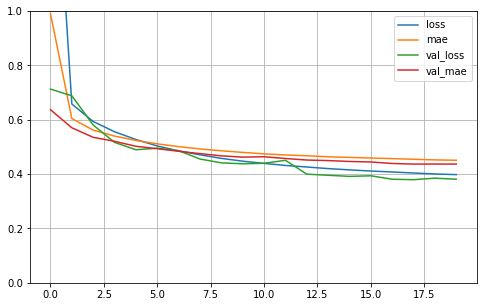

In [15]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [16]:
X_new = X_test[:3]

In [17]:
y_pred = model.predict(X_new)
print (y_pred)
print(y_test[:3])

[[0.5328768]
 [1.8915398]
 [3.4040868]]
[0.477   0.458   5.00001]


In [23]:
del model

In [27]:
del model

In [28]:
keras.backend.clear_session()

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

![](Functional.JPG "Title")

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [42]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [43]:
model_history = model.fit(X_train, y_train, epochs=80, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/80
11610/11610 [==============================] - 1s 103us/sample - loss: 1.4768 - mae: 0.8896 - val_loss: 1.1430 - val_mae: 0.6737
Epoch 2/80
11610/11610 [==============================] - 1s 59us/sample - loss: 0.7901 - mae: 0.6511 - val_loss: 1.8823 - val_mae: 0.6522
Epoch 3/80
11610/11610 [==============================] - 1s 58us/sample - loss: 0.7134 - mae: 0.6151 - val_loss: 1.4391 - val_mae: 0.6103
Epoch 4/80
11610/11610 [==============================] - 1s 68us/sample - loss: 0.6779 - mae: 0.5981 - val_loss: 0.6359 - val_mae: 0.5719
Epoch 5/80
11610/11610 [==============================] - 1s 60us/sample - loss: 0.6301 - mae: 0.5753 - val_loss: 1.0426 - val_mae: 0.5776
Epoch 6/80
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5963 - mae: 0.5580 - val_loss: 0.9066 - val_mae: 0.5491
Epoch 7/80
11610/11610 [==============================] - 1s 63us/sample - loss: 0.5795 - mae: 0.5507 - val_loss: 0.

Epoch 54/80
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3632 - mae: 0.4310 - val_loss: 0.5875 - val_mae: 0.4273
Epoch 55/80
11610/11610 [==============================] - 1s 57us/sample - loss: 0.3625 - mae: 0.4316 - val_loss: 0.3708 - val_mae: 0.4180
Epoch 56/80
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3611 - mae: 0.4295 - val_loss: 0.3424 - val_mae: 0.4172
Epoch 57/80
11610/11610 [==============================] - 1s 63us/sample - loss: 0.3599 - mae: 0.4298 - val_loss: 0.4701 - val_mae: 0.4238
Epoch 58/80
11610/11610 [==============================] - 1s 59us/sample - loss: 0.3595 - mae: 0.4287 - val_loss: 0.3902 - val_mae: 0.4202
Epoch 59/80
11610/11610 [==============================] - 1s 55us/sample - loss: 0.3593 - mae: 0.4284 - val_loss: 0.3818 - val_mae: 0.4184
Epoch 60/80
11610/11610 [==============================] - 1s 58us/sample - loss: 0.3578 - mae: 0.4277 - val_loss: 0.4556 - val_mae: 0.4255
Epoch 61/80
11610/11

In [37]:
mae_test = model.evaluate(X_test, y_test)



5160/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [38]:
model_history.history

{'loss': [0.3653960509946077,
  0.36476045961938575,
  0.3635920624297616,
  0.36249311711642374,
  0.3617056052300768,
  0.3606292951065954,
  0.3597421649814576,
  0.35885738616971286,
  0.358151336952492,
  0.3571816803077292,
  0.35627670977056075,
  0.35553825948897566,
  0.3547157687015517,
  0.35417369634400764,
  0.35311236991438755,
  0.35239727003732496,
  0.3520078915470536,
  0.3510709950268833,
  0.3506646203080916,
  0.3499835927151689,
  0.34961114746039534,
  0.3488265401992584,
  0.3480559986485786,
  0.34787930535613004,
  0.34719907470451766,
  0.3463302628219795,
  0.34610869293065033,
  0.345359680544293,
  0.3450066592547526,
  0.34435364233328286,
  0.3436238773597098,
  0.3433962245166148,
  0.3427650815808085,
  0.3422419812636166,
  0.3419955732286438,
  0.341315132862119,
  0.3406148228380415,
  0.3406616835220429,
  0.34017376785746534,
  0.33962031871362763],
 'mae': [0.43168452,
  0.4318634,
  0.43044814,
  0.43035424,
  0.4290943,
  0.4281664,
  0.4283907

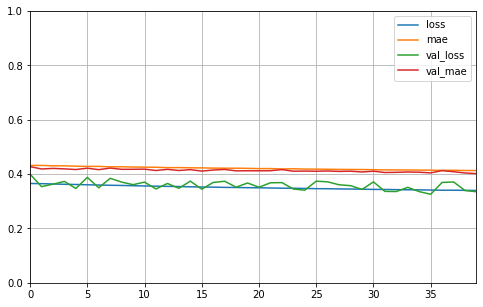

In [39]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [48]:
%pwd

'C:\\Users\\pukhr'

C:\Users\pukhr


In [49]:
model.save("my_Func_model.h5")

In [6]:
%pwd

'C:\\Users\\pukhr\\Python_Notebooks'

In [7]:
%cd C:\\Users\\pukhr

C:\Users\pukhr


In [57]:
del model

In [53]:
keras.backend.clear_session()

In [54]:
model = keras.models.load_model("my_Func_model.h5")

In [55]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

In [56]:
y_pred = model.predict(X_new)
print (y_pred)

[[0.7604362]
 [1.5982888]
 [4.140891 ]]


In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [60]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [61]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Model-{epoch:02d}.h5")

In [62]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 113us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 63us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 77us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 61us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 67us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 92us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 1s 86us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 88us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4586 - val_

In [63]:
del model
keras.backend.clear_session()

In [8]:
model = keras.models.load_model("Model-10.h5")

In [29]:
mse_test = model.evaluate(X_test, y_test,batch_size=5160)


5160/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
print (mse_test)

0.43821001052856445


In [15]:
model.metrics_names

['loss']

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_diff=y_pred-y_test

In [26]:
y_pred.shape

(5160, 1)

In [ ]:
mse = (y_diff^2)

In [66]:
del model
keras.backend.clear_session()

In [67]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [68]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [69]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [70]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 96us/sample - loss: 1.4530 - val_loss: 0.7972
Epoch 2/10
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7402 - val_loss: 0.6640
Epoch 3/10
11610/11610 [==============================] - 1s 71us/sample - loss: 0.6512 - val_loss: 0.6182
Epoch 4/10
11610/11610 [==============================] - 1s 64us/sample - loss: 0.5951 - val_loss: 0.5563
Epoch 5/10
11610/11610 [==============================] - 1s 62us/sample - loss: 0.5534 - val_loss: 0.5014
Epoch 6/10
11610/11610 [==============================] - 1s 60us/sample - loss: 0.5197 - val_loss: 0.4723
Epoch 7/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4930 - val_loss: 0.4516
Epoch 8/10
11610/11610 [==============================] - 1s 59us/sample - loss: 0.4724 - val_loss: 0.4380
Epoch 9/10
11610/11610 [==============================] - 1s 58us/sample - loss: 0.4559 - val_l

In [71]:
model = keras.models.load_model("Best_Model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)


5160/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [72]:
del model
keras.backend.clear_session()

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [75]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("early_stop_model.h5", save_best_only=True)

In [76]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

#     patience: Number of epochs with no improvement after which training will be stopped.

In [77]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/200
11610/11610 [==============================] - 1s 111us/sample - loss: 2.5576 - val_loss: 2.2008
Epoch 2/200
11610/11610 [==============================] - 1s 59us/sample - loss: 1.0781 - val_loss: 0.8693
Epoch 3/200
11610/11610 [==============================] - 1s 67us/sample - loss: 0.8431 - val_loss: 0.8327
Epoch 4/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.7697 - val_loss: 0.7867
Epoch 5/200
11610/11610 [==============================] - 1s 65us/sample - loss: 0.7245 - val_loss: 0.6680
Epoch 6/200
11610/11610 [==============================] - 1s 64us/sample - loss: 0.6849 - val_loss: 0.6689
Epoch 7/200
11610/11610 [==============================] - 1s 61us/sample - loss: 0.6512 - val_loss: 0.6133
Epoch 8/200
11610/11610 [==============================] - 1s 62us/sample - loss: 0.6212 - val_loss: 0.5908
Epoch 9/200
11610/11610 [==============================] - 1s 57us/sample - loss: 0.59

In [78]:
model = keras.models.load_model("early_stop_model.h5")
mse_test = model.evaluate(X_test, y_test)


5160/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================